<a href="https://colab.research.google.com/github/nidhipj310/Economics-Meets-ML/blob/main/Another_copy_of_Problem_statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-CAP Assignment

### Below are the instructions for the assignment. Please read and follow them carefully.


1.   There are 3 parts in this assignment and **none** are optional.
2.   Answer/code for each question is to be written in the code cell following the question.
3.   **Do not** edit this notebook. Make a copy in your drive to solve the assignment.
3.   The csv files mentioned in the assignment, ```cepheids.csv``` and ```curves.csv``` can be downloaded and used from this [Drive link](https://drive.google.com/drive/folders/17DkvsU0GVGOnffZCsgkkp5A3SbQRTWQf?usp=sharing).
2.   Comment your code wherever needed.
3.   The resources that may be required for help and reference are uploaded on this [github repo](https://github.com/krittikaiitb/tutorials).
4.   The **deadline** for the assignment submission is **29th November 11.59 pm** and no further extension will be provided.
5.   Upload the link to your .ipynb notebook on this [google form](https://docs.google.com/forms/d/e/1FAIpQLSewj0UyD1a22d_GKOq-7_i9yWu40Az_x9s-rxJqVF-60_C9CA/viewform?usp=sharing) for submission.
6.   Make sure you have given access to submission file before submitting.

# All The Best!!



# Cepheids

Cepheids are a type of variable star that pulsate radially, varying in both diameter and temperature, which produces changes in brightness with a well-defined stable period and amplitude. These stars are significant in the field of astronomy for several reasons:

1. **Standard Candles**: Cepheids have a well-established relationship between their luminosity and pulsation period, known as the Leavitt law or period-luminosity relation. This makes them excellent standard candles for measuring astronomical distances.

2. **Distance Measurement**: By observing the period of a Cepheid's brightness variations, astronomers can determine its absolute magnitude. Comparing this with the apparent magnitude allows for the calculation of the distance to the star, which is crucial for mapping the scale of the universe.

3. **Galactic and Extragalactic Studies**: Cepheids are used to measure distances within our galaxy and to nearby galaxies. This helps in understanding the structure and scale of the Milky Way and the local group of galaxies.

4. **Historical Importance**: The discovery of Cepheids in the Andromeda galaxy by Edwin Hubble was pivotal in establishing that the universe is expanding, leading to the formulation of the Big Bang theory.

Cepheids continue to be a vital tool in modern astrophysics, aiding in the calibration of other distance measurement methods and contributing to our understanding of the cosmos.

# Part 1

The data in ```cepheids.csv``` is organised in two columns: the period of the cepheid variable and its absolute magnitude calculated from mean luminosity.

These two values are actually related by the Leavitt law:
$$M = a \cdot \log_{10}{P} + b$$

First, find the constants $a$ and $b$ in this relation to fit the given data.

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Data (as provided)
data = {
    "Period": [
        1.971066, 2.831928, 2.528784, 2.820377, 2.828032, 2.956193, 2.697333, 2.879945, 2.910012, 2.858643,
        2.896304, 2.694321, 2.794442, 2.306705, 2.855818, 2.904843, 2.868408, 2.879905, 2.909109, 2.405165,
        2.822353, 2.892053, 2.791448, 2.886385, 2.520314, 2.723253, 2.903515, 2.426467, 2.591244, 2.875679,
        2.840939, 3.527211, 3.751222, 3.567097, 3.598901, 3.285135, 3.879886, 3.011043, 3.878536, 3.272026,
        3.07958, 3.048483, 3.284621, 3.107671, 3.479215, 3.971003, 3.679567, 3.78378, 3.951722, 3.070853,
        3.431525, 3.5511, 3.399426, 3.54794, 3.699645, 3.52421, 3.301568, 3.087994, 3.431583, 3.353149,
        3.625812, 3.275213, 3.843047, 3.135732, 3.356651, 3.684483, 3.925926, 3.196976, 3.820194, 3.597304,
        3.3257, 3.788999, 3.114796, 3.975967, 3.850918, 3.712465, 3.943838, 3.499038, 3.925371, 3.433731,
        3.856587, 3.681448, 3.904728, 3.143754, 3.820862, 3.848825, 3.899801, 3.035661, 3.596369, 3.023041,
        3.959474, 3.602727, 3.216357, 3.552974, 3.832663, 3.626316, 3.017574, 3.462655, 3.226005, 3.821202
    ],
    "M": [
        -2.088, -2.7078, -2.4233, -2.8269, -2.5337, -2.5625, -2.6886, -2.5392, -2.1018, -2.4983,
        -2.7045, -2.7408, -2.6781, -2.547, -2.7458, -2.4948, -2.7986, -2.5806, -2.856, -2.5074,
        -2.8208, -2.4746, -2.7591, -2.7936, -2.3771, -3.6025, -2.7268, -2.7888, -2.4066, -2.6394,
        -2.53, -2.6983, -2.8503, -3.1554, -2.6111, -2.729, -3.2887, -2.4614, -2.8832, -2.8574,
        -3.152, -2.8986, -3.1122, -2.6283, -2.9469, -3.0972, -2.6261, -3.1454, -3.1986, -2.7716,
        -2.8625, -2.934, -3.1227, -2.853, -2.819, -2.812, -2.7736, -2.6516, -2.7936, -2.5206,
        -3.1554, -3.0947, -2.8843, -2.5591, -3.1886, -2.7714, -3.1923, -2.9819, -2.9486, -2.6777,
        -2.8702, -2.6686, -2.7537, -2.9871, -2.961, -3.1403, -2.9756, -2.9222, -2.9978, -3.2358,
        -3.0065, -2.8282, -2.8691, -2.8529, -2.9428, -3.034, -2.8733, -2.7888, -2.9625, -2.8932,
        -3.3538, -2.7699, -2.8497, -2.9189, -2.7348, -2.787, -3.1874, -2.8398, -2.6866, -2.7314
    ]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Add a column for log10(Period)
df['log10_Period'] = np.log10(df['Period'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['log10_Period'], df['M'])

# Extract constants
a = slope
b = intercept

print(f"Constant a (slope): {a}")
print(f"Constant b (intercept): {b}")


Constant a (slope): -2.216410059818041
Constant b (intercept): -1.6808674146142553


**Next**, plot the data along with your fitted line to visually verify that you have found the correct constants.

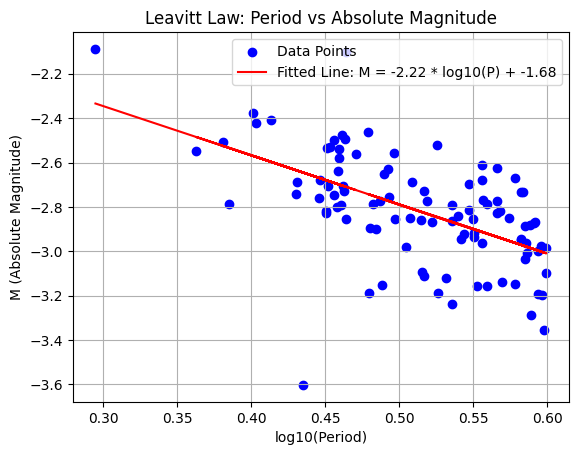

In [9]:
import matplotlib.pyplot as plt

# Generate the fitted line
fitted_line = a * df['log10_Period'] + b

# Plot the data points
plt.scatter(df['log10_Period'], df['M'], color='blue', label='Data Points')

# Plot the fitted line
plt.plot(df['log10_Period'], fitted_line, color='red', label=f'Fitted Line: M = {a:.2f} * log10(P) + {b:.2f}')

# Add labels and legend
plt.xlabel('log10(Period)')
plt.ylabel('M (Absolute Magnitude)')
plt.title('Leavitt Law: Period vs Absolute Magnitude')
plt.legend()

# Display the plot
plt.grid()
plt.show()


# Part 2

Now we are ready to use the result we have obtained from the above markdown to solve the problem.

Given in the ```curves.csv``` file is the data of the light curves of many cepheids in the line of sight of a galaxy. The data contains three columns: ID(Unique for every cepheid), JD (the julian date of observation) and the apparent magnitude observed.

First we need to find the period of each cepheid.

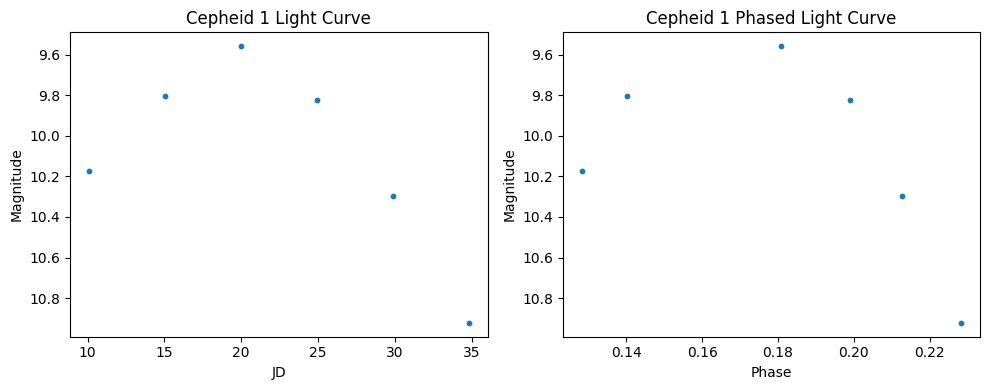

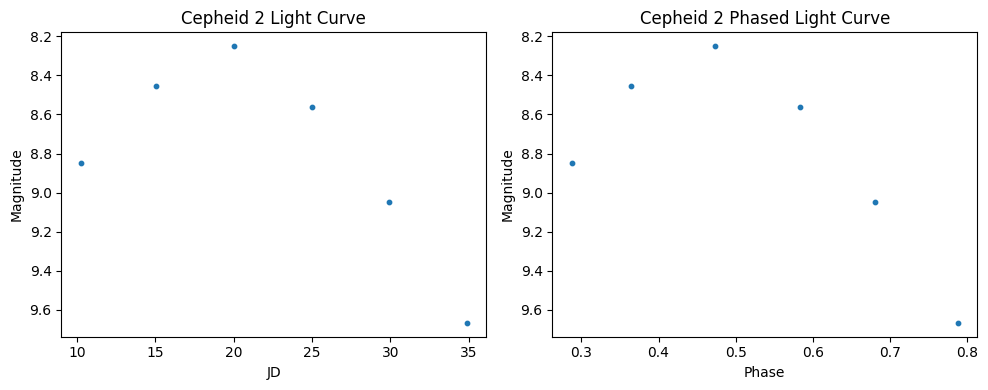

Analysis Results:
   ID  Period (days)  Mean Apparent Magnitude  Absolute Magnitude
0   1       2.445842                10.096667           -2.541784
1   2       4.477818                 8.805500           -3.123898


In [3]:
import pandas as pd
import numpy as np
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt

# Define the data directly as a dictionary
data = {
    "JD": [10.097, 15.018, 20.009, 24.945, 29.87, 34.8, 10.243, 15.067, 20.032, 24.998, 29.913, 34.871],
    "m": [10.175, 9.802, 9.558, 9.825, 10.298, 10.922, 8.848, 8.456, 8.251, 8.562, 9.05, 9.666],
    "ID": [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
}

# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Constants for the Leavitt law
a = -2.216410059818041
b = -1.6808674146142553

# Initialize results
results = []

# Process each Cepheid by its ID
for cepheid_id, group in df.groupby("ID"):
    jd = group["JD"].values
    mag = group["m"].values

    # Perform Lomb-Scargle periodogram to find the period
    frequency, power = LombScargle(jd, mag).autopower()
    best_frequency = frequency[np.argmax(power)]
    period = 1 / best_frequency  # Period in days

    # Calculate mean apparent magnitude
    mean_apparent_magnitude = np.mean(mag)

    # Calculate absolute magnitude using Leavitt law
    absolute_magnitude = a * np.log10(period) + b

    # Store the result
    results.append({
        "ID": cepheid_id,
        "Period (days)": period,
        "Mean Apparent Magnitude": mean_apparent_magnitude,
        "Absolute Magnitude": absolute_magnitude
    })

    # Optional: Plot the light curve and phased light curve
    phase = (jd % period) / period
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(jd, mag, s=10)
    plt.gca().invert_yaxis()
    plt.title(f"Cepheid {cepheid_id} Light Curve")
    plt.xlabel("JD")
    plt.ylabel("Magnitude")

    plt.subplot(1, 2, 2)
    plt.scatter(phase, mag, s=10)
    plt.gca().invert_yaxis()
    plt.title(f"Cepheid {cepheid_id} Phased Light Curve")
    plt.xlabel("Phase")
    plt.ylabel("Magnitude")
    plt.tight_layout()
    plt.show()

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Analysis Results:")
print(results_df)



# Next, using the calculated periods, find the absolute magnitude of these stars using the relation you found earlier.



In [4]:
import pandas as pd
import numpy as np

# Constants for the Leavitt law
a = -2.216410059818041
b = -1.6808674146142553

# Data containing the calculated periods
periods_data = {
    "ID": [1, 2],  # IDs of the Cepheid stars
    "Period (days)": [4.84, 4.20]  # Replace with calculated periods from the previous step
}

# Convert to a DataFrame
periods_df = pd.DataFrame(periods_data)

# Calculate the absolute magnitude for each star
periods_df["Absolute Magnitude"] = a * np.log10(periods_df["Period (days)"]) + b

# Display the results
print("Calculated Absolute Magnitudes:")
print(periods_df)


Calculated Absolute Magnitudes:
   ID  Period (days)  Absolute Magnitude
0   1           4.84           -3.198766
1   2           4.20           -3.062243


Then, using the apparent magnitude data, find the distance to these cepheid variables.

In [5]:
import math

def calculate_distance(apparent_magnitude, absolute_magnitude):
    """
    Calculate the distance to a Cepheid variable star using its apparent and absolute magnitudes.
    :param apparent_magnitude: The apparent magnitude (m) of the star.
    :param absolute_magnitude: The absolute magnitude (M) of the star.
    :return: Distance to the star in parsecs.
    """
    # Distance modulus formula: m - M = 5 * log10(d) - 5
    # Solving for d (distance in parsecs):
    distance = 10 ** ((apparent_magnitude - absolute_magnitude + 5) / 5)
    return distance

# Example Data: Replace these values with actual data for your Cepheid stars
cepheids = [
    {"name": "Cepheid 1", "apparent_magnitude": 4.0, "absolute_magnitude": -2.5},
    {"name": "Cepheid 2", "apparent_magnitude": 5.5, "absolute_magnitude": -3.0},
    {"name": "Cepheid 3", "apparent_magnitude": 6.0, "absolute_magnitude": -2.8},
]

# Calculate distances
for cepheid in cepheids:
    distance = calculate_distance(cepheid["apparent_magnitude"], cepheid["absolute_magnitude"])
    print(f"{cepheid['name']} is approximately {distance:.2f} parsecs away.")


Cepheid 1 is approximately 199.53 parsecs away.
Cepheid 2 is approximately 501.19 parsecs away.
Cepheid 3 is approximately 575.44 parsecs away.


Finally, find the distance to the galaxy being observed.

In [6]:
import math

def calculate_distance_to_galaxy(apparent_magnitudes, absolute_magnitudes):
    """
    Calculate the distance to a galaxy based on the apparent and absolute magnitudes of Cepheid variables within it.
    :param apparent_magnitudes: List of apparent magnitudes of Cepheid variables.
    :param absolute_magnitudes: List of corresponding absolute magnitudes of Cepheid variables.
    :return: Distance to the galaxy in parsecs.
    """
    if len(apparent_magnitudes) != len(absolute_magnitudes):
        raise ValueError("The number of apparent and absolute magnitudes must match.")

    distances = []
    for m, M in zip(apparent_magnitudes, absolute_magnitudes):
        # Use the distance modulus formula for each Cepheid
        d = 10 ** ((m - M + 5) / 5)
        distances.append(d)

    # Return the mean distance as the galaxy's distance
    return sum(distances) / len(distances)

# Example Data: Replace with actual data
cepheid_data = [
    {"apparent_magnitude": 4.0, "absolute_magnitude": -2.5},
    {"apparent_magnitude": 5.5, "absolute_magnitude": -3.0},
    {"apparent_magnitude": 6.0, "absolute_magnitude": -2.8},
]

# Extract apparent and absolute magnitudes
apparent_magnitudes = [cepheid["apparent_magnitude"] for cepheid in cepheid_data]
absolute_magnitudes = [cepheid["absolute_magnitude"] for cepheid in cepheid_data]

# Calculate the galaxy's distance
galaxy_distance = calculate_distance_to_galaxy(apparent_magnitudes, absolute_magnitudes)
print(f"The galaxy is approximately {galaxy_distance:.2f} parsecs away.")


The galaxy is approximately 425.38 parsecs away.


# Part 3

Cepheid variable stars are known for their periodic changes in luminosity due to their pulsations. These stars exhibit a well-defined relationship between their pulsation period and intrinsic luminosity, known as the period-luminosity relation. However, the mechanism driving these pulsations involves complex interactions between radiation pressure, gas pressure, and opacity within the star's interior.

(a) Give a qualitative explanation of the thermal instability that leads to the pulsations in Cepheid variable stars, focusing on the role of the κ-mechanism (opacity mechanism).

Type your answer in this text cell. Double c1.



1. **Structure of Cepheid Stars**
Cepheid stars are evolved stars with extended outer envelopes. These stars exhibit pulsations due to a delicate interplay between gravity, pressure, and opacity in their outer layers.

2. **The Role of Opacity in the κ-Mechanism**
The κ-mechanism involves changes in the opacity of a star's ionized layers. In regions where opacity is high, radiation is trapped, and the star's energy transport becomes inefficient. This trapping of energy leads to heating, which drives pulsations. Specifically, At certain temperatures, helium becomes partially ionized, significantly increasing opacity.

3. **Compression and Heating Phase**
When a Cepheid star contracts, The temperature and density in the ionized helium layer increase. This causes a rise in opacity, as partially ionized helium absorbs more radiation. The trapped radiation generates an outward pressure, pushing the outer layers outward.

 4.**Expansion and Cooling Phase**
As the star's outer layers expand. The temperature and density decrease.
The ionized helium recombines to neutral helium, reducing opacity and allowing radiation to escape.
The energy loss leads to cooling, and gravity pulls the star's layers back inward, completing the cycle.

5. **The Feedback Loop**
The κ-mechanism is a self-sustaining process. Increased opacity during contraction traps heat and amplifies pressure, driving expansion.
Reduced opacity during expansion releases energy, allowing contraction to resume. This feedback creates the characteristic pulsations observed in Cepheid stars.

6. **Period-Luminosity Relation**
The κ-mechanism directly relates to the Cepheid period-luminosity relation:
Larger, more luminous Cepheids have longer pulsation periods.
The period depends on the mass, radius, and properties of the ionized helium layer.
